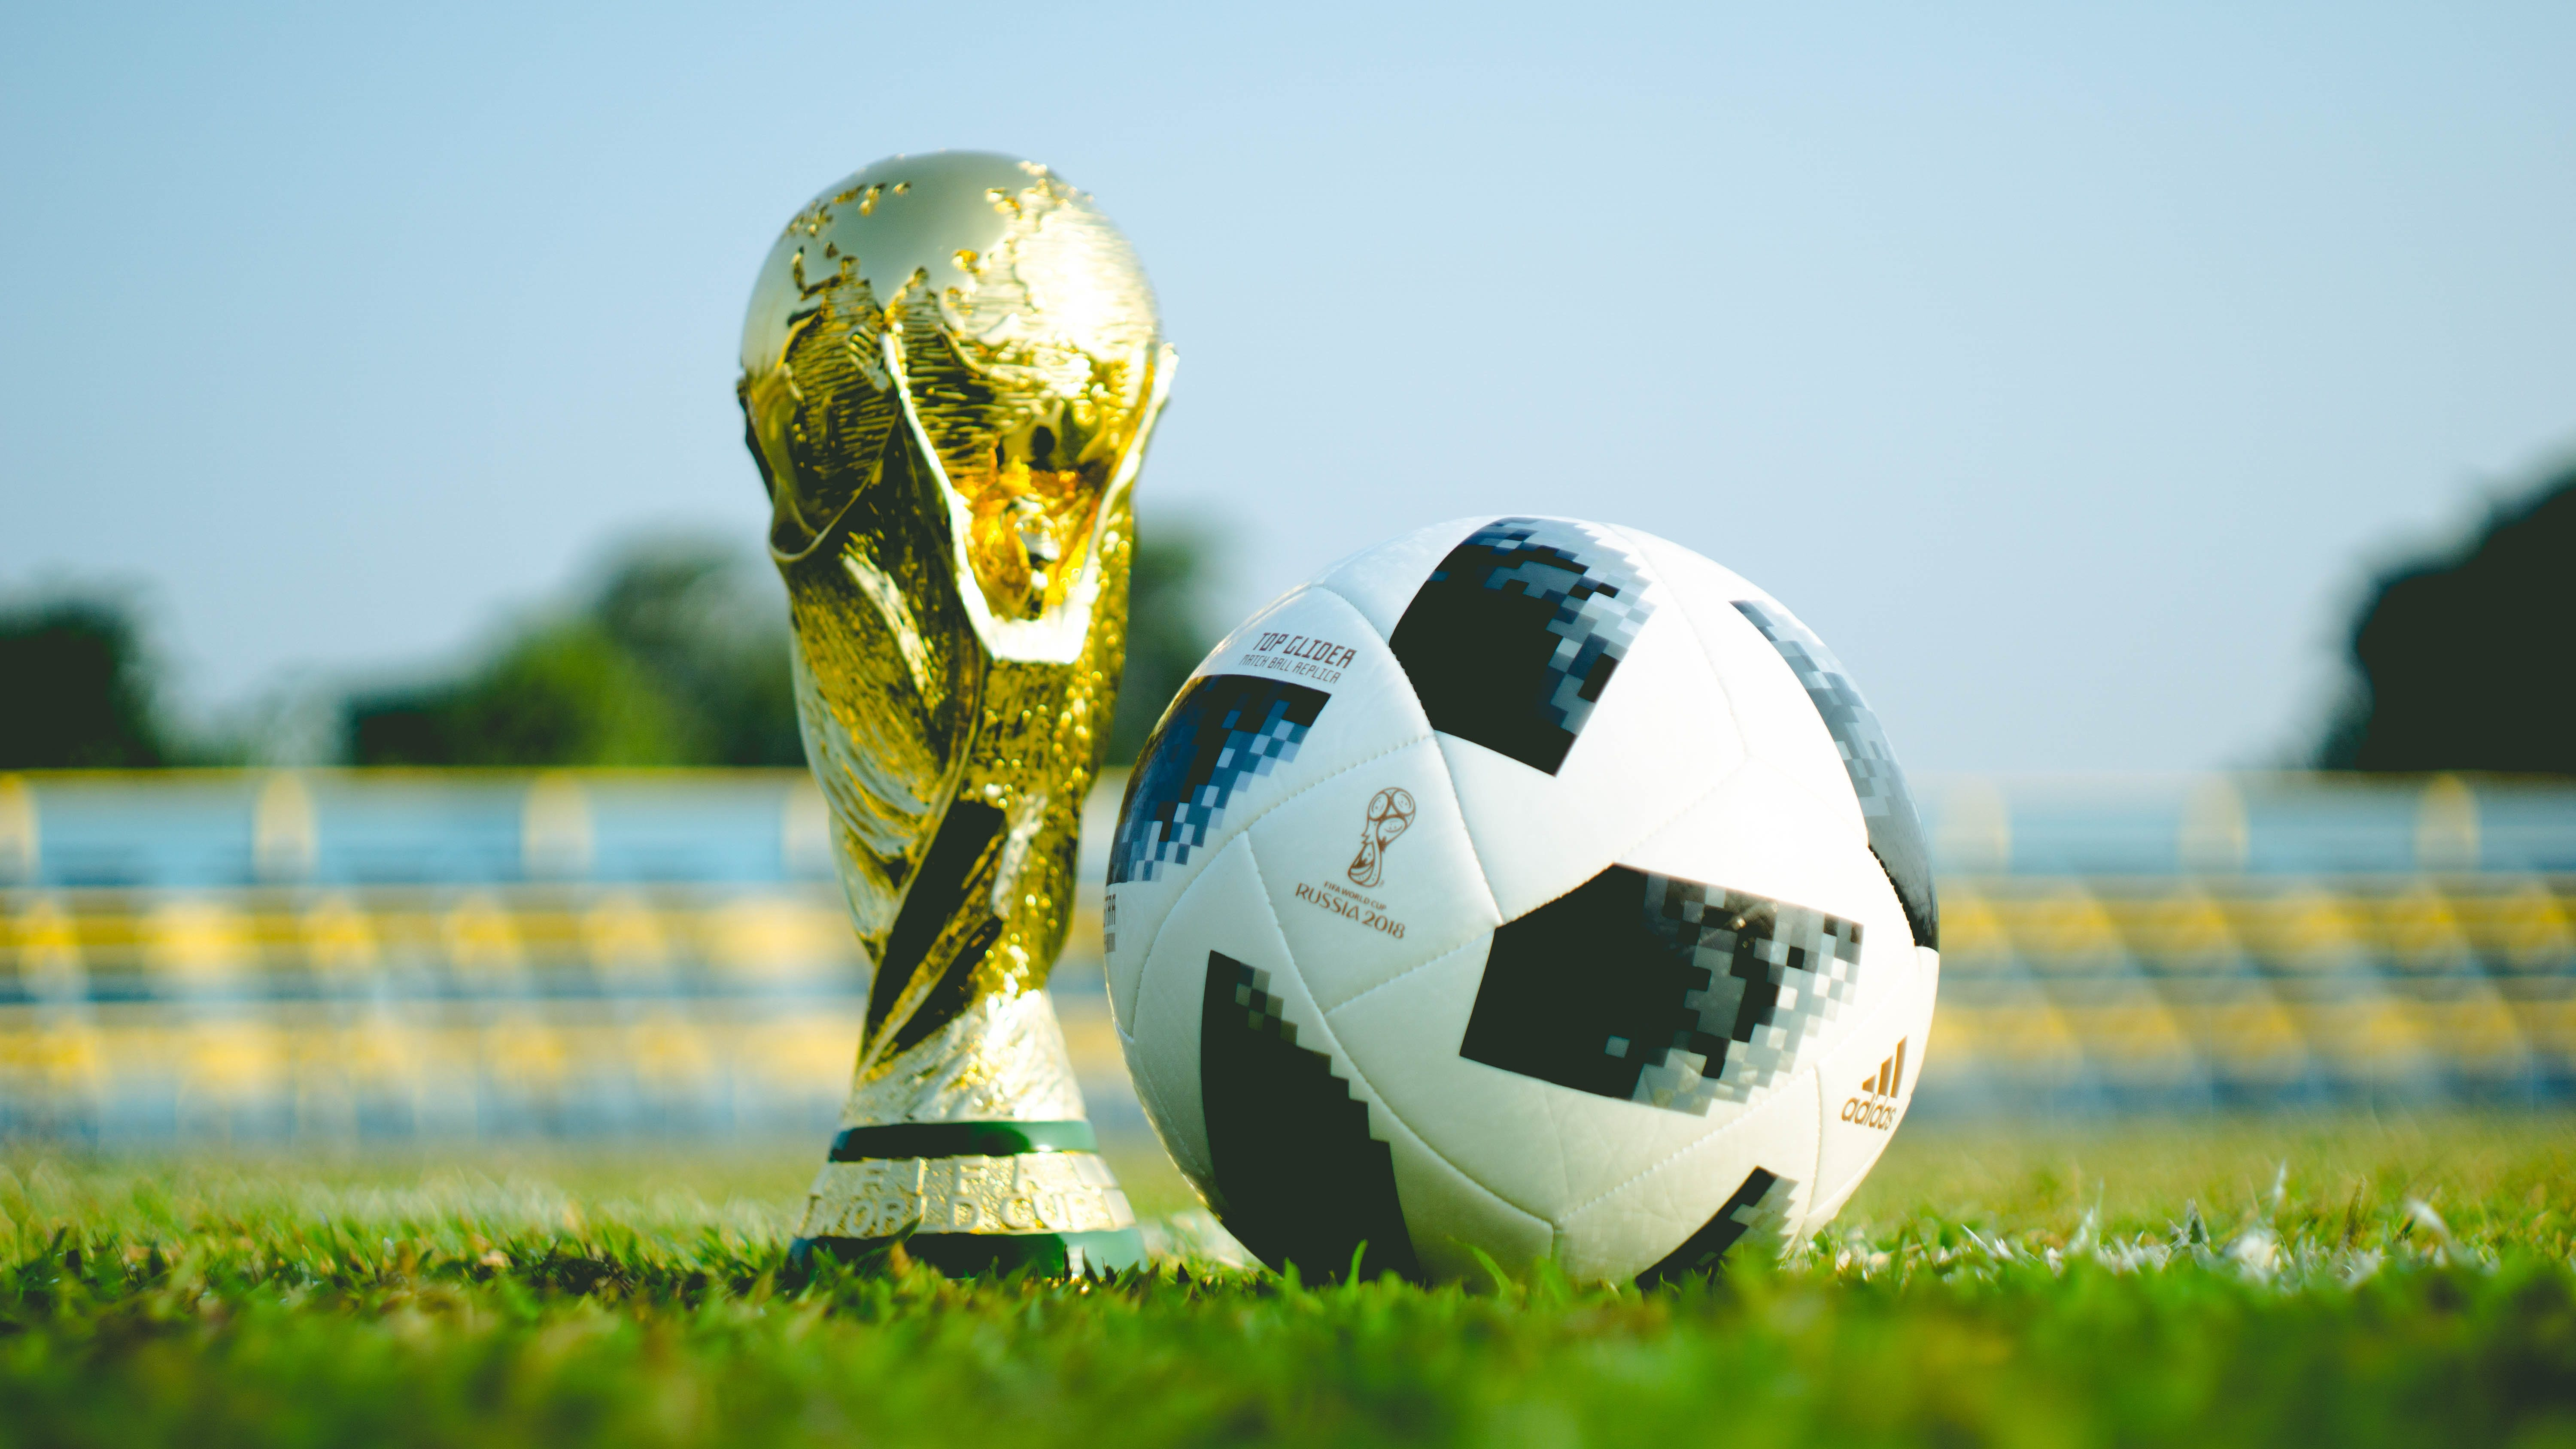

In [1]:
from IPython.display import Image
Image(filename='1_0A8eTfcCEI4vQdErHdrwEQ.jpg', width="800", height='50')

# Problem Statement

With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung
analysts who put great efforts to provide accurate data to answer every question of fans. The

FIFA World Cup is a global football competition contested by the various football-playing
nations of the world. It is contested every four years and is the most prestigious and important
trophy in the sport of football.

The World Cups dataset shows all information about all the World Cups in history, while the
World Cup Matches dataset shows all the results from the matches contested as part of the
cups. 

Find key metrics and factors that influence the World Cup win. Do your own research
and come up with your findings.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
players = pd.read_csv("WorldCupPlayers.csv")
matches = pd.read_csv("WorldCupMatches.csv")
world_cup = pd.read_csv("WorldCups.csv")

In [4]:
players.head()

RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN

In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [6]:
players.shape

(37784, 9)

In [7]:
matches.head()

Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1                    18346.0                   2.0                   0.0   
2                    24059.0                   2.0                   0.0   
3                     2549.0                   1.0                   0.0   
4                    23409.0                   0.0                   0.0   

                  Referee               Assistant 1  \
0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1       MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2     TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3   WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4     REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   

                  Assistant 2  RoundID  MatchID Home Team Initials  \
0         REGO Gilberto (BRA)    201.0   1096.0                FRA   
1       WARNKEN Alberto (CHI)    201.0   1090.0                USA   
2         BALWAY Thomas (FRA)    201.0   1093.0                YUG   
3    MATEUCCI Francisco (URU)    201.0   1098.0                ROU   
4  RADULESCU Constantin (ROU)    201.0   1085.0                ARG   

  Away Team Initials  
0                MEX  
1                BEL  
2                BRA  
3                PER  
4                FRA

In [8]:
matches.tail()

Year Datetime Stage Stadium City Home Team Name  Home Team Goals  \
4567   NaN      NaN   NaN     NaN  NaN            NaN              NaN   
4568   NaN      NaN   NaN     NaN  NaN            NaN              NaN   
4569   NaN      NaN   NaN     NaN  NaN            NaN              NaN   
4570   NaN      NaN   NaN     NaN  NaN            NaN              NaN   
4571   NaN      NaN   NaN     NaN  NaN            NaN              NaN   

      Away Team Goals Away Team Name Win conditions  Attendance  \
4567              NaN            NaN            NaN         NaN   
4568              NaN            NaN            NaN         NaN   
4569              NaN            NaN            NaN         NaN   
4570              NaN            NaN            NaN         NaN   
4571              NaN            NaN            NaN         NaN   

      Half-time Home Goals  Half-time Away Goals Referee Assistant 1  \
4567                   NaN                   NaN     NaN         NaN   
4568                   NaN                   NaN     NaN         NaN   
4569                   NaN                   NaN     NaN         NaN   
4570                   NaN                   NaN     NaN         NaN   
4571                   NaN                   NaN     NaN         NaN   

     Assistant 2  RoundID  MatchID Home Team Initials Away Team Initials  
4567         NaN      NaN      NaN                NaN                NaN  
4568         NaN      NaN      NaN                NaN                NaN  
4569         NaN      NaN      NaN                NaN                NaN  
4570         NaN      NaN      NaN                NaN                NaN  
4571         NaN      NaN      NaN                NaN                NaN

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [10]:
matches.shape

(4572, 20)

In [11]:
world_cup.head()

Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607

In [12]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [13]:
world_cup.shape

(20, 10)

## Data Cleaning

In [14]:
# Drop the empty rows from the matches data
matches.dropna(subset = ['Year'], inplace = True)

In [15]:
matches.tail()

Year              Datetime                     Stage  \
847  2014.0  05 Jul 2014 - 17:00             Quarter-finals   
848  2014.0  08 Jul 2014 - 17:00                Semi-finals   
849  2014.0  09 Jul 2014 - 17:00                Semi-finals   
850  2014.0  12 Jul 2014 - 17:00   Play-off for third place   
851  2014.0  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
847     Arena Fonte Nova        Salvador     Netherlands              0.0   
848     Estadio Mineirao  Belo Horizonte          Brazil              1.0   
849   Arena de Sao Paulo       Sao Paulo     Netherlands              0.0   
850     Estadio Nacional        Brasilia          Brazil              0.0   
851  Estadio do Maracana  Rio De Janeiro         Germany              1.0   

     Away Team Goals Away Team Name                         Win conditions  \
847              0.0     Costa Rica  Netherlands win on penalties (4 - 3)    
848              7.0        Germany                                          
849              0.0      Argentina    Argentina win on penalties (2 - 4)    
850              3.0    Netherlands                                          
851              0.0      Argentina          Germany win after extra time    

     Attendance  Half-time Home Goals  Half-time Away Goals  \
847     51179.0                   0.0                   0.0   
848     58141.0                   0.0                   5.0   
849     63267.0                   0.0                   0.0   
850     68034.0                   0.0                   2.0   
851     74738.0                   0.0                   0.0   

                   Referee                  Assistant 1  \
847  Ravshan IRMATOV (UZB)  RASULOV Abduxamidullo (UZB)   
848  RODRIGUEZ Marco (MEX)      TORRENTERA Marvin (MEX)   
849     C�neyt �AKIR (TUR)         DURAN Bahattin (TUR)   
850  HAIMOUDI Djamel (ALG)         ACHIK Redouane (MAR)   
851   Nicola RIZZOLI (ITA)        Renato FAVERANI (ITA)   

                  Assistant 2   RoundID      MatchID Home Team Initials  \
847  KOCHKAROV Bakhadyr (KGZ)  255953.0  300186488.0                NED   
848     QUINTERO Marcos (MEX)  255955.0  300186474.0                BRA   
849         ONGUN Tarik (TUR)  255955.0  300186490.0                NED   
850   ETCHIALI Abdelhak (ALG)  255957.0  300186502.0                BRA   
851      Andrea STEFANI (ITA)  255959.0  300186501.0                GER   

    Away Team Initials  
847                CRC  
848                GER  
849                ARG  
850                NED  
851                ARG

In [16]:
# Counting the countries that played their Home games
matches['Home Team Name'].value_counts()

Home Team Name
Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: count, Length: 78, dtype: int64

In [17]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Home Team Name
rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

In [18]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [19]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [20]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [21]:
wrong = wrong + old_name
correct = correct + new_name

In [22]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [23]:
for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [24]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: count, dtype: int64)

### Most Number of World Cup Winning Title

In [25]:
winner = world_cup['Winner'].value_counts()
winner

Winner
Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: count, dtype: int64

In [26]:
# Most number of Worls Cup Runner-Up
runnerup = world_cup['Runners-Up'].value_counts()
runnerup

Runners-Up
Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: count, dtype: int64

In [27]:
# Most Number of World cup Third Place Team
third = world_cup['Third'].value_counts()
third

Third
Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: count, dtype: int64

In [28]:
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams.columns = ['Winner', 'Runner-Up', 'Third']
teams

Winner  Runner-Up  Third
Brazil               5          2      2
Italy                4          2      1
Germany              4          4      4
Uruguay              2          0      0
Argentina            2          3      0
England              1          0      0
France               1          1      2
Spain                1          0      0
Netherlands          0          3      1
Czechoslovakia       0          2      0
Hungary              0          2      0
Sweden               0          1      2
Poland               0          0      2
USA                  0          0      1
Austria              0          0      1
Chile                0          0      1
Portugal             0          0      1
Croatia              0          0      1
Turkey               0          0      1

<Figure size 1400x800 with 0 Axes>

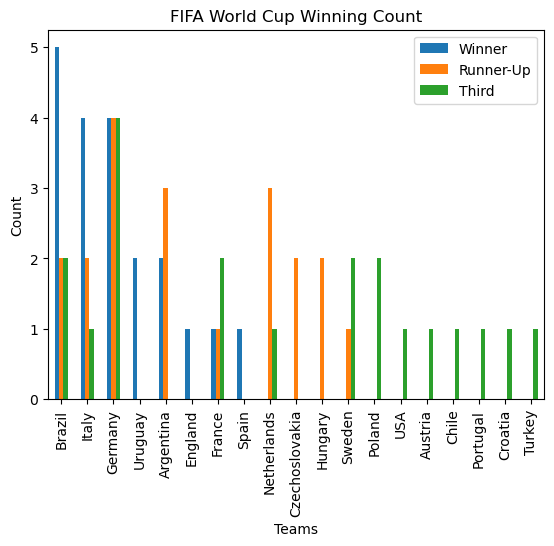

In [29]:
plt.figure(figsize = (14,8))
teams.plot(kind = 'bar')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title("FIFA World Cup Winning Count")
plt.show()

### Number of Goals Per Country

In [30]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [31]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [32]:
goals = pd.concat([home, away], ignore_index = True)
goals = goals.groupby('Countries').sum()
goals

Goals
Countries                  
Algeria                14.0
Angola                  1.0
Argentina             133.0
Australia              11.0
Austria                43.0
...                     ...
United Arab Emirates    2.0
Uruguay                80.0
Wales                   4.0
Yugoslavia             60.0
Zaire                   0.0

[82 rows x 1 columns]

In [33]:
goals = goals.sort_values(by = 'Goals', ascending = False)
goals

Goals
Countries                 
Germany              235.0
Brazil               225.0
Argentina            133.0
Italy                128.0
France               108.0
...                    ...
Trinidad and Tobago    0.0
Canada                 0.0
China PR               0.0
Dutch East Indies      0.0
Zaire                  0.0

[82 rows x 1 columns]

<Figure size 1400x800 with 0 Axes>

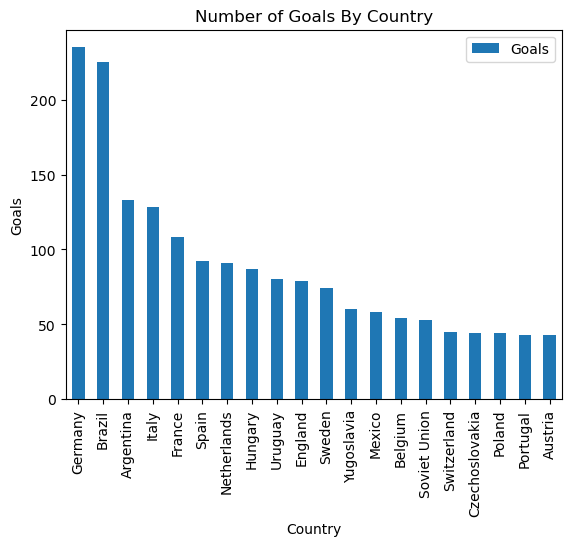

In [34]:
plt.figure(figsize = (14,8))
goals[:20].plot(kind = 'bar')
plt.xlabel("Country")
plt.ylabel("Goals")
plt.title("Number of Goals By Country")
plt.show()

#### Number of Teams, Goals and Matches per Cup

In [35]:
world_cup['Attendance'] = world_cup['Attendance'].str.replace(".", "")
world_cup.head()

Year      Country   Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay  Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy    Italy  Czechoslovakia  Germany     Austria   
2  1938       France    Italy         Hungary   Brazil      Sweden   
3  1950       Brazil  Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18     590549  
1           70              16             17     363000  
2           84              15             18     375700  
3           88              13             22    1045246  
4          140              16             26     768607

Text(0.5, 1.0, 'Qualified Teams Per Year')

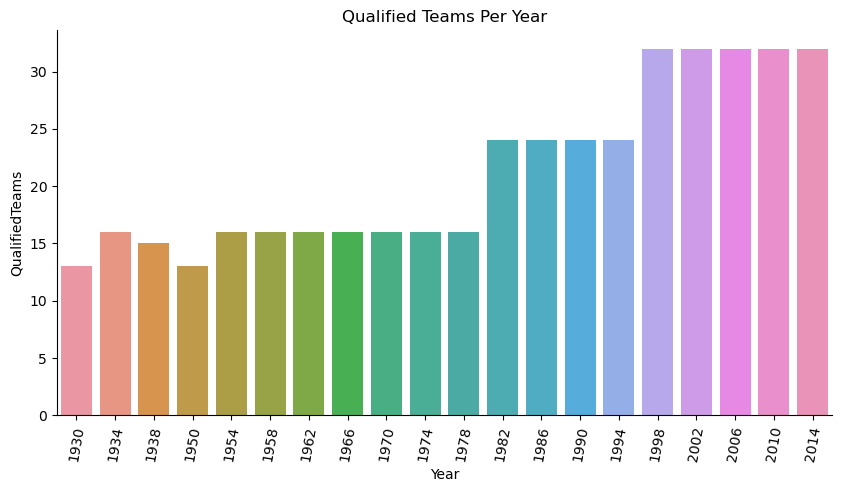

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

Text(0.5, 1.0, 'Goals Scored by Teams Per Year')

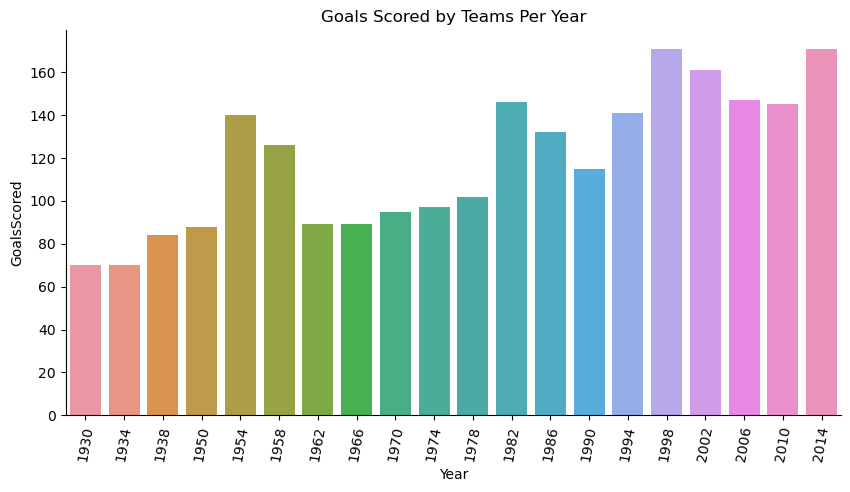

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')

Text(0.5, 1.0, 'Matches Plyed Scored by Teams Per Year')

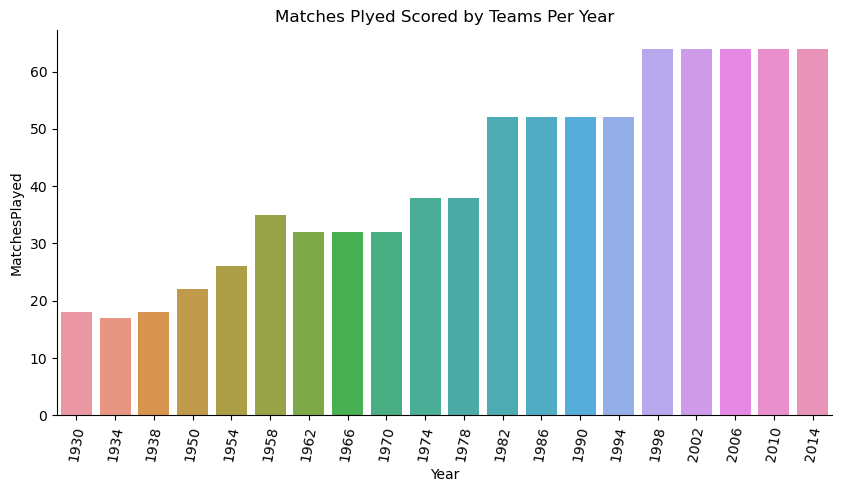

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Plyed Scored by Teams Per Year')

### Goals Per Team Per World Cup

In [39]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [40]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [41]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                   
1930.0 Argentina   18.0
       Brazil       5.0
       Chile        5.0
       France       4.0
       Paraguay     1.0
...                 ...
1998.0 Iran         2.0
       Mexico       8.0
       Norway       5.0
       Tunisia      1.0
2006.0 IR Iran      0.0

[427 rows x 1 columns]

In [42]:
goals = goals.reset_index()

In [43]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

Year     Country  Goals
0    1930.0   Argentina   18.0
7    1930.0     Uruguay   15.0
6    1930.0         USA    7.0
8    1930.0  Yugoslavia    7.0
1    1930.0      Brazil    5.0
..      ...         ...    ...
355  2014.0       Japan    2.0
361  2014.0      Russia    2.0
340  2014.0    Cameroon    1.0
352  2014.0    Honduras    1.0
353  2014.0     IR Iran    1.0

[427 rows x 3 columns]

In [44]:
top5 = goals.groupby('Year').head()
top5.head(10)

Year         Country  Goals
0   1930.0       Argentina   18.0
7   1930.0         Uruguay   15.0
6   1930.0             USA    7.0
8   1930.0      Yugoslavia    7.0
1   1930.0          Brazil    5.0
13  1934.0           Italy   12.0
11  1934.0         Germany   11.0
10  1934.0  Czechoslovakia    9.0
9   1934.0         Austria    7.0
12  1934.0         Hungary    5.0

In [45]:
import plotly.graph_objects as go

x, y = goals['Year'].values, goals['Goals'].values

data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()

### Matches With Highest Number of Attendance

In [46]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')

matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y') if not pd.isnull(x) else '')

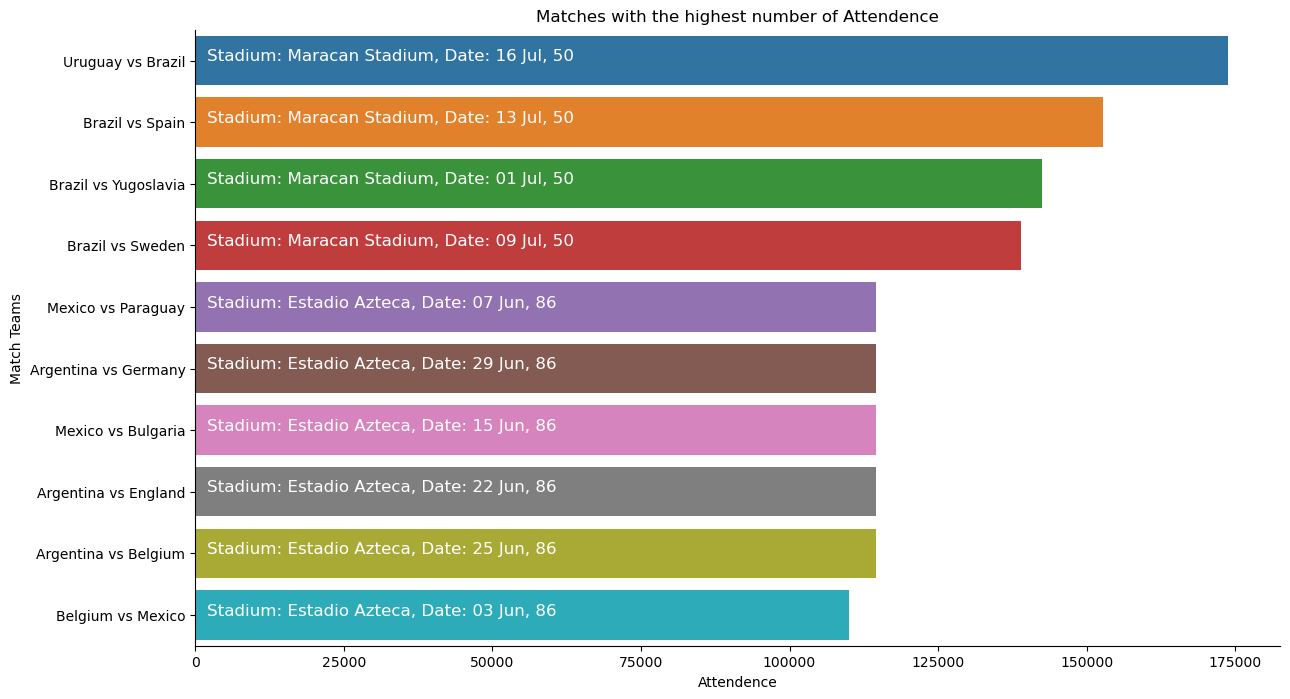

In [47]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (14,8))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

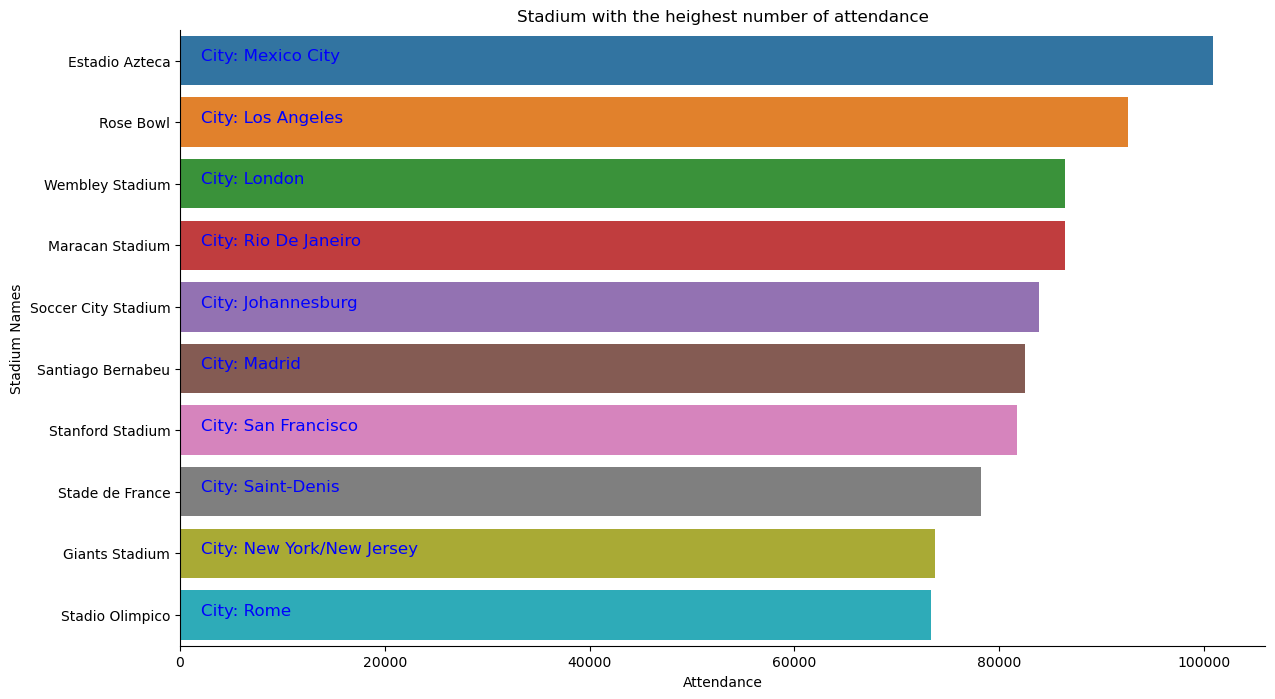

In [48]:
# Stadium with Highest Average Attendance
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (14,8))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')
        
plt.show()

Text(0.5, 1.0, 'Highest Number of Matches in City')

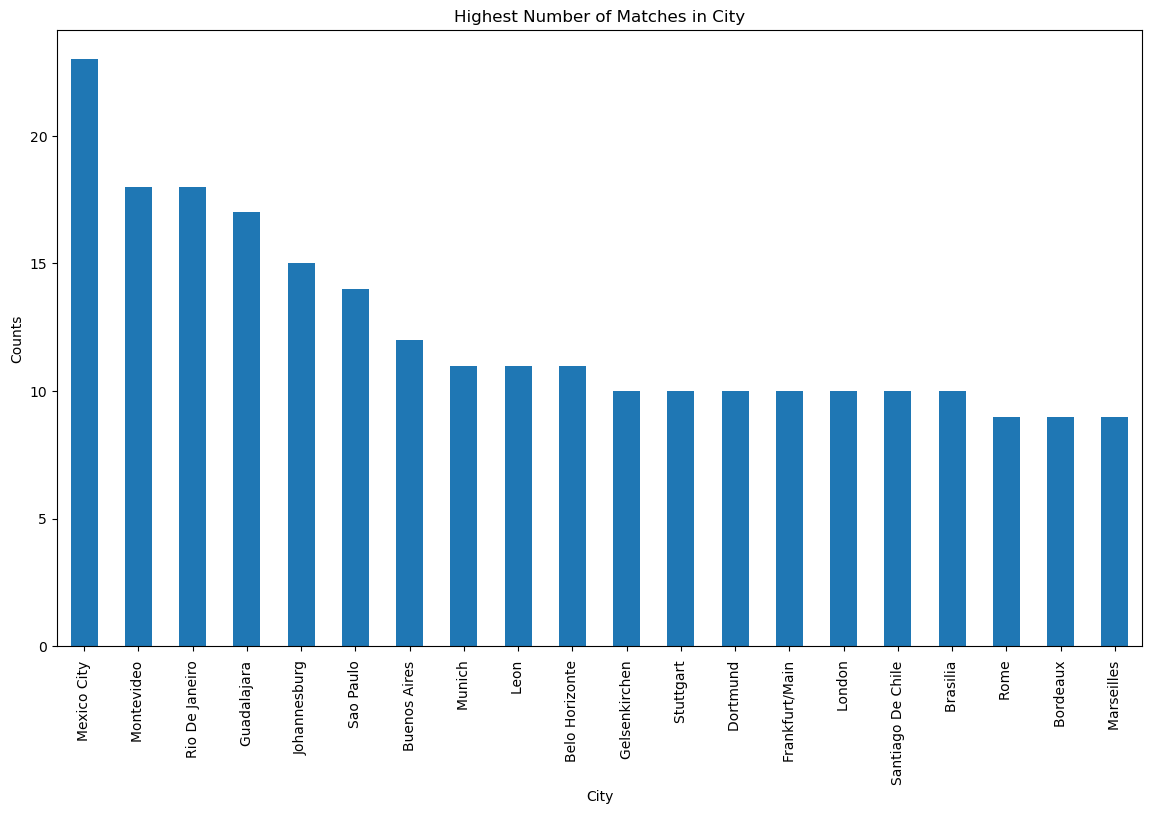

In [49]:
plt.figure(figsize= (14,8))
matches['City'].value_counts()[:20].plot(kind = 'bar')
plt.xlabel("City")
plt.ylabel("Counts")
plt.title("Highest Number of Matches in City")

### Which countries had won the cup?

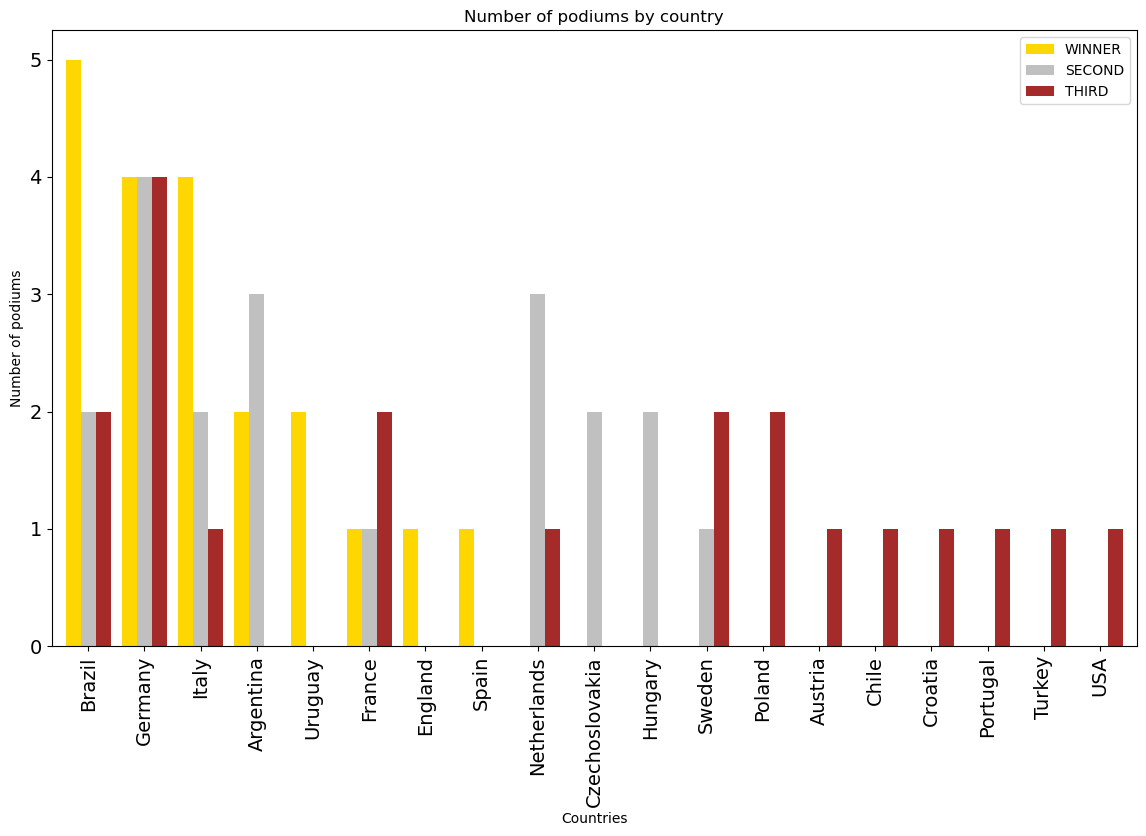

In [50]:
gold = world_cup["Winner"]
silver = world_cup["Runners-Up"]
bronze = world_cup["Third"]

# Creating DataFrames with specific column names
gold_count = pd.DataFrame(gold.value_counts()).rename(columns={'Winner': 'count'}).rename(columns={'count': 'WINNER'})
silver_count = pd.DataFrame(silver.value_counts()).rename(columns={'Runners-Up': 'count'}).rename(columns={'count': 'SECOND'})
bronze_count = pd.DataFrame(bronze.value_counts()).rename(columns={'Third': 'count'}).rename(columns={'count': 'THIRD'})

# Joining the counts into a single DataFrame
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

# Plotting
podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color=['gold', 'silver', 'brown'], figsize=(14, 8), fontsize=14,
                  width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podiums')
plt.title('Number of podiums by country')
plt.show()

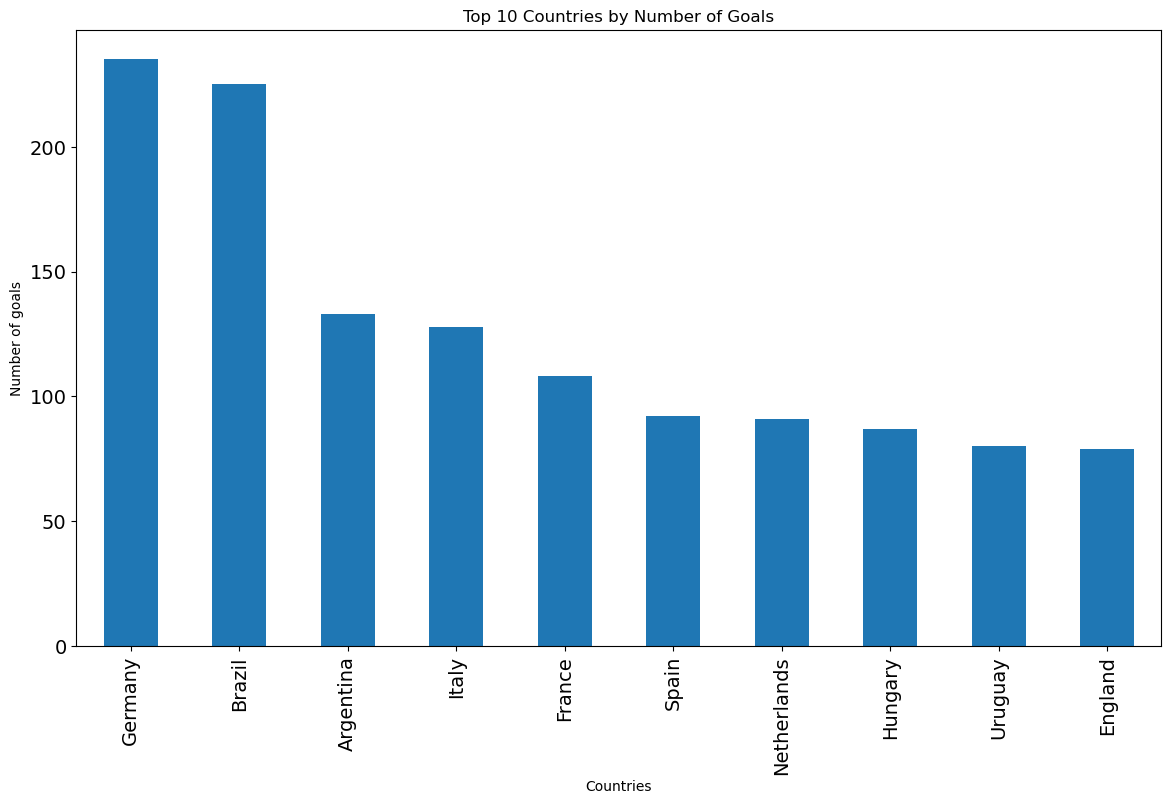

In [51]:
# Number of goals per Country
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

# Rename columns to a common format
home = home.rename(columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'})
away = away.rename(columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'})

# Concatenate the two DataFrames
goal_per_country = pd.concat([home, away])

# Ensure 'goals' column is of type int
goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

# Group by 'countries' and sum the goals, then sort by the number of goals
goal_per_country = goal_per_country.groupby('countries')['goals'].sum().sort_values(ascending=False)

# Plotting the top 10 countries
goal_per_country[:10].plot(kind="bar", figsize=(14, 8), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 Countries by Number of Goals')
plt.show()

In [52]:
# Match outcome by Home and Away Teams
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [53]:
matches.head()

Year    Datetime    Stage         Stadium         City Home Team Name  \
0  1930  13 Jul, 30  Group 1         Pocitos  Montevideo          France   
1  1930  13 Jul, 30  Group 4  Parque Central  Montevideo             USA   
2  1930  14 Jul, 30  Group 2  Parque Central  Montevideo      Yugoslavia   
3  1930  14 Jul, 30  Group 3         Pocitos  Montevideo         Romania   
4  1930  15 Jul, 30  Group 1  Parque Central  Montevideo       Argentina   

   Home Team Goals  Away Team Goals Away Team Name Win conditions  ...  \
0              4.0              1.0         Mexico                 ...   
1              3.0              0.0        Belgium                 ...   
2              2.0              1.0         Brazil                 ...   
3              3.0              1.0           Peru                 ...   
4              1.0              0.0         France                 ...   

   Half-time Home Goals  Half-time Away Goals                 Referee  \
0                   3.0                   0.0  LOMBARDI Domingo (URU)   
1                   2.0                   0.0       MACIAS Jose (ARG)   
2                   2.0                   0.0     TEJADA Anibal (URU)   
3                   1.0                   0.0   WARNKEN Alberto (CHI)   
4                   0.0                   0.0     REGO Gilberto (BRA)   

                Assistant 1                 Assistant 2 RoundID  MatchID  \
0     CRISTOPHE Henry (BEL)         REGO Gilberto (BRA)   201.0   1096.0   
1  MATEUCCI Francisco (URU)       WARNKEN Alberto (CHI)   201.0   1090.0   
2   VALLARINO Ricardo (URU)         BALWAY Thomas (FRA)   201.0   1093.0   
3       LANGENUS Jean (BEL)    MATEUCCI Francisco (URU)   201.0   1098.0   
4      SAUCEDO Ulises (BOL)  RADULESCU Constantin (ROU)   201.0   1085.0   

   Home Team Initials Away Team Initials        outcome  
0                 FRA                MEX  Home Team Win  
1                 USA                BEL  Home Team Win  
2                 YUG                BRA  Home Team Win  
3                 ROU                PER  Home Team Win  
4                 ARG                FRA  Home Team Win  

[5 rows x 21 columns]

In [54]:
mt = matches['outcome'].value_counts()
mt

outcome
Home Team Win    488
DRAW             190
Away Team Win    174
Name: count, dtype: int64

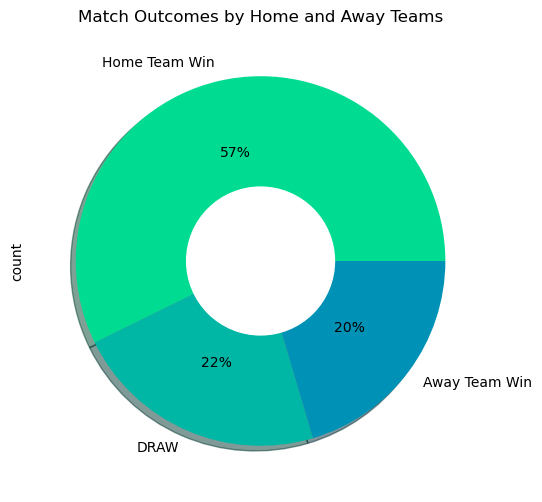

In [55]:
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()

In [56]:
# We didn't considered draw matches here because in many cells we had NaN values given which corresponded to 0 values and could
# had made our pie chart biased.

def winner(data1):
    if data1['Home Team Goals'] > data1['Away Team Goals']:
        return 'Home team won'
    elif data1['Home Team Goals'] < data1['Away Team Goals']:
        return 'Away Team won'

In [57]:
matches['winner']=matches.apply(lambda x:winner(x),axis=1)

In [58]:
matches['winner'].value_counts()

winner
Home team won    488
Away Team won    174
Name: count, dtype: int64

In [59]:
sizes = [488, 174]

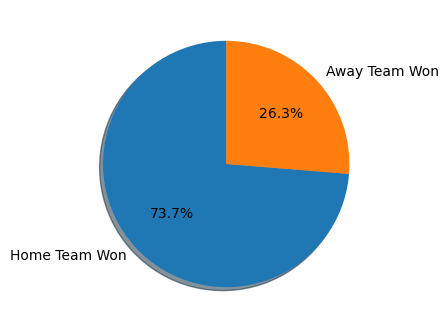

In [60]:
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0.1, 0, 0)
ax.pie(sizes, labels = ['Home Team Won','Away Team Won'], autopct = '%1.1f%%', shadow = True,
      startangle = 90)

plt.show()

In [61]:
players['Team Initials'].unique()

array(['FRA', 'MEX', 'USA', 'BEL', 'YUG', 'BRA', 'ROU', 'PER', 'ARG',
       'CHI', 'BOL', 'PAR', 'URU', 'AUT', 'HUN', 'EGY', 'SUI', 'NED',
       'SWE', 'GER', 'ESP', 'ITA', 'TCH', 'INH', 'CUB', 'NOR', 'POL',
       'ENG', 'SCO', 'FRG', 'TUR', 'KOR', 'URS', 'WAL', 'NIR', 'COL',
       'BUL', 'PRK', 'POR', 'ISR', 'MAR', 'SLV', 'GDR', 'AUS', 'ZAI',
       'HAI', 'TUN', 'IRN', 'CMR', 'NZL', 'ALG', 'HON', 'KUW', 'CAN',
       'IRQ', 'DEN', 'UAE', 'CRC', 'IRL', 'KSA', 'RUS', 'GRE', 'NGA',
       'RSA', 'JPN', 'JAM', 'CRO', 'SEN', 'SVN', 'ECU', 'CHN', 'TRI',
       'CIV', 'SCG', 'ANG', 'CZE', 'GHA', 'TOG', 'UKR', 'SRB', 'SVK',
       'BIH'], dtype=object)

In [62]:
data_nat = pd.DataFrame(players[['Team Initials','Player Name']])
data_nat.head()

Team Initials       Player Name
0           FRA       Alex THEPOT
1           MEX   Oscar BONFIGLIO
2           FRA  Marcel LANGILLER
3           MEX      Juan CARRENO
4           FRA   Ernest LIBERATI

In [63]:
d2 = pd.DataFrame(data_nat['Team Initials'].value_counts())
d2

count
Team Initials       
BRA             2403
ITA             1843
ARG             1807
ENG             1378
FRG             1364
...              ...
KUW               66
CAN               66
UAE               66
CUB               45
INH               18

[82 rows x 1 columns]

<Figure size 1400x800 with 0 Axes>

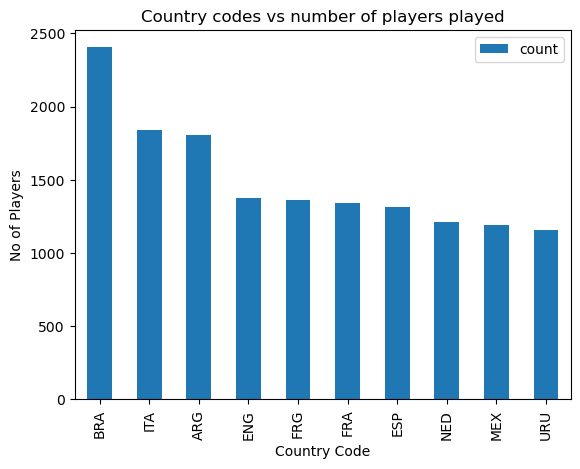

In [64]:
plt.figure(figsize=(14,8))
d2[:10].plot(kind='bar')
plt.xlabel("Country Code")
plt.ylabel("No of Players")
plt.title("Country codes vs number of players played")
plt.show()

## Summary

* Brazil has won the tournament most number of times.
* A complete depiction of number of world cups won, first runner-up, and third positions by various participating teams.
* Germany scored the most number of goals throughout the history of worldcup followed by Brazil and Argentina.
* Brazil has again scored a majority of total goals playing as home team whereas spain scored more goals playing as away country rather than home country.
* Mexico City have Maximum number of matches of World Cup.
* Most Team won their home matches.
* 73.6 % of the matches were won by home team while 26.4 % were won by away team. 
* Brazil has played the most number of players followed by Italy and Argentina.

In [65]:
matches.to_csv('WorldCupMatches1.csv', index=False)
players.to_csv('WorldCupPlayers1.csv', index = False)
world_cup.to_csv('WorldCups1.csv', index = False)